# Master Data Science Data_VIZ
### WADE El Hadji Malick
### HAYKAL Fayad

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 1. Chargement et Nettoyage des données 

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#path_School = "/users/mmath/wade/Bureau/Master_DS/Projets/Data_viz/Synthese_donnees_des_semis.csv"
path = "Synthese_donnees_des_semis.csv"

df = pd.read_csv(path,  sep='\t',  decimal=",")

df.head(10)

,Bancs,camera,zone,Pop,5_degres_C_TMG_h,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3.0,1.0,11.0,Témoin,414.00,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3.0,2.0,11.0,Témoin,430.86,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3.0,3.0,11.0,Témoin,382.86,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3.0,4.0,11.0,Témoin,420.00,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4.0,1.0,11.0,Témoin,432.89,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0
5,4.0,2.0,11.0,Témoin,413.82,17.24,2646.0,8.0,12.0,20.0,32.0,36.0,36.0,44.0
6,4.0,3.0,11.0,Témoin,446.80,18.62,2646.0,4.0,4.0,8.0,16.0,20.0,24.0,40.0
7,4.0,4.0,11.0,Témoin,429.60,17.90,2646.0,0.0,0.0,8.0,8.0,12.0,20.0,20.0
8,3.0,1.0,11.0,Témoin,354.22,14.76,5731.2,16.0,28.0,28.0,32.0,36.0,36.0,36.0
9,3.0,2.0,26.0,Témoin,377.78,15.74,5731.2,12.0,20.0,20.0,20.0,32.0,36.0,36.0


In [3]:
print ("Lignes: " ,df.shape[0])
print ("Colonnes: " ,df.shape[1])
print("---------------")
print ("\nVariables:")
print(df.dtypes)
print ("\nValeurs uniques :")
print(df.nunique())

Lignes:  961
Colonnes:  14
---------------

Variables:
Bancs                  float64
camera                 float64
zone                   float64
Pop                     object
5_degres_C_TMG_h       float64
5_degres_C_TMG_j       float64
Aire_sous_la_courbe    float64
15_j                   float64
16_j                   float64
17_j                   float64
18_j                   float64
19_j                   float64
20_j                   float64
21_j                   float64
dtype: object

Valeurs uniques :
Bancs                    2
camera                   4
zone                    24
Pop                      6
5_degres_C_TMG_h       699
5_degres_C_TMG_j       365
Aire_sous_la_courbe    686
15_j                    17
16_j                    20
17_j                    22
18_j                    23
19_j                    23
20_j                    24
21_j                    25
dtype: int64


In [4]:
print ("\nTotal des valeurs manquantes :  ",df.isnull().sum().values.sum())

print("\n")
print(df.isnull().sum())


Total des valeurs manquantes :   16


Bancs                  1
camera                 1
zone                   1
Pop                    1
5_degres_C_TMG_h       2
5_degres_C_TMG_j       2
Aire_sous_la_courbe    1
15_j                   1
16_j                   1
17_j                   1
18_j                   1
19_j                   1
20_j                   1
21_j                   1
dtype: int64


On voit que notre jeux de données posséde des lignes avec avec au moins un e valeur manquante.  
On choisit de les supprimer, ce qui représente une perte de 2 lignes d'observations de données

In [5]:
Perte_de_donnees = df.shape[0]
df = df.dropna()

Perte_de_donnees = (Perte_de_donnees - df.shape[0])/100

print("En supprimant les lignes avec des valeurs manquantes, on a une perte de données de ", Perte_de_donnees,"%")

En supprimant les lignes avec des valeurs manquantes, on a une perte de données de  0.02 %


In [6]:
df.isnull().sum()

Bancs                  0
camera                 0
zone                   0
Pop                    0
5_degres_C_TMG_h       0
5_degres_C_TMG_j       0
Aire_sous_la_courbe    0
15_j                   0
16_j                   0
17_j                   0
18_j                   0
19_j                   0
20_j                   0
21_j                   0
dtype: int64

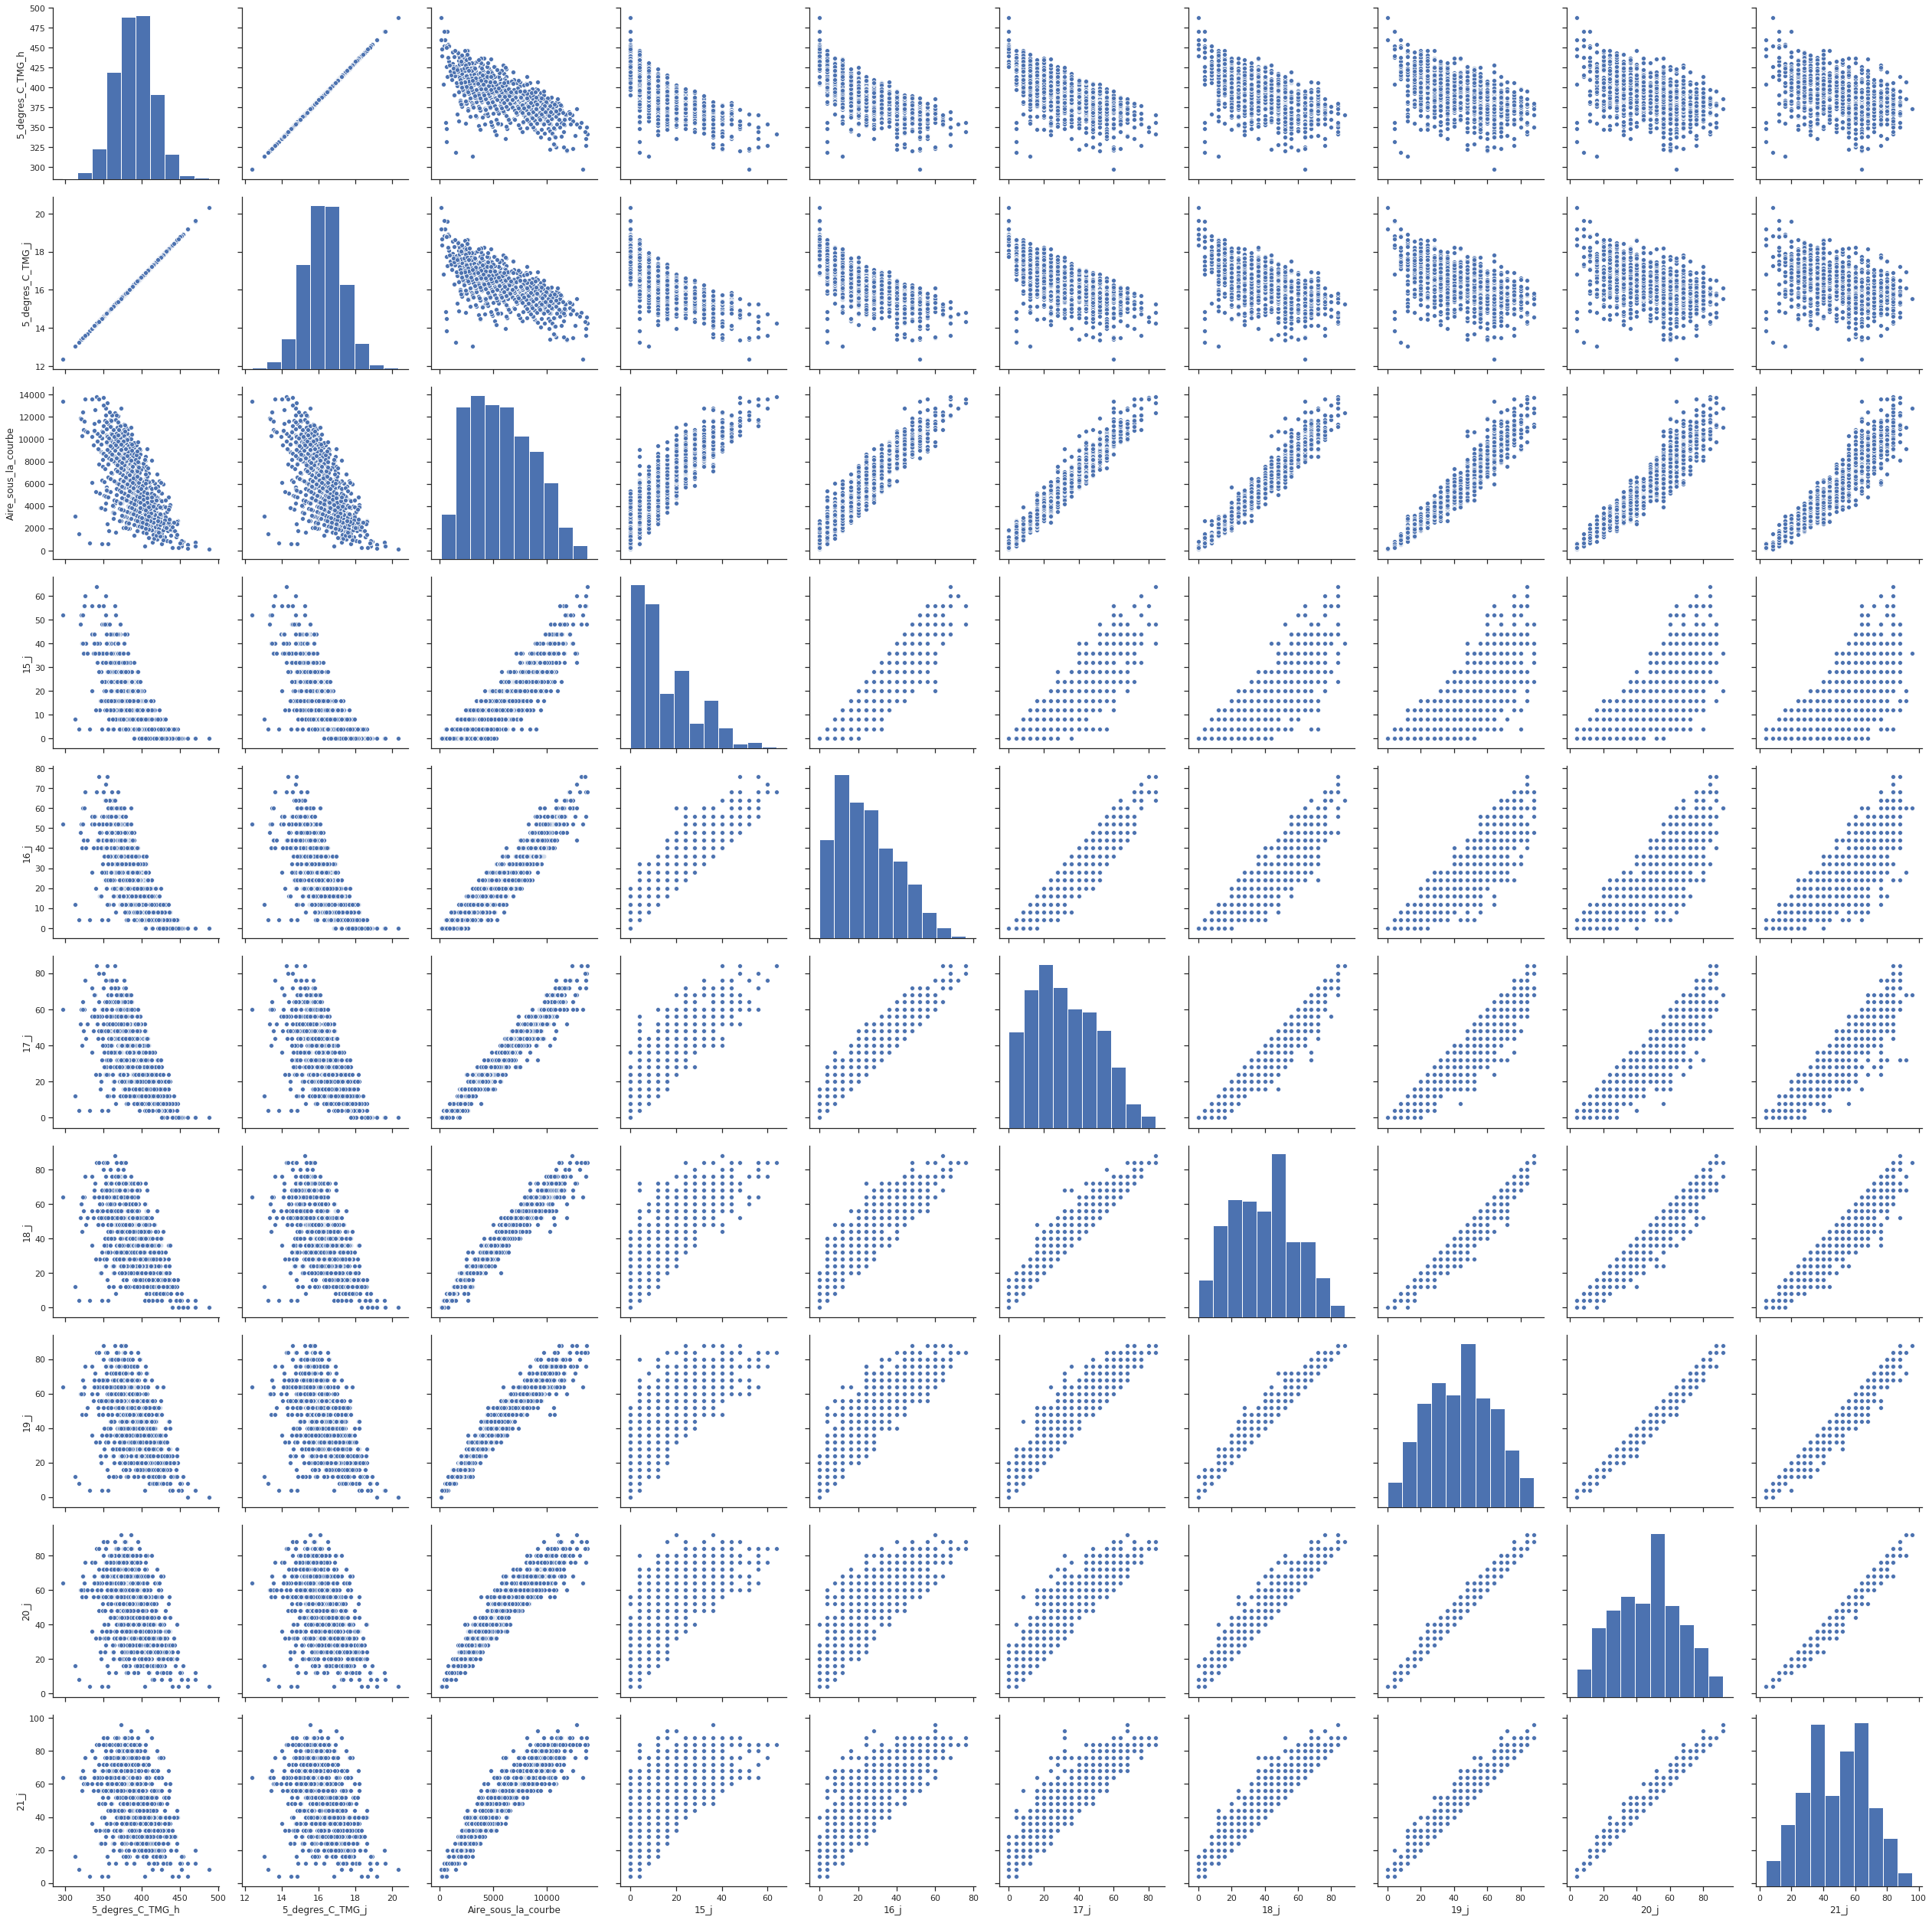

In [8]:
import seaborn as sns

Col_pairplot = ["5_degres_C_TMG_h", "5_degres_C_TMG_j", "Aire_sous_la_courbe", "15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, vars=Col_pairplot, height=3.5)
g

## 2. Réduction de dimensions / ACP

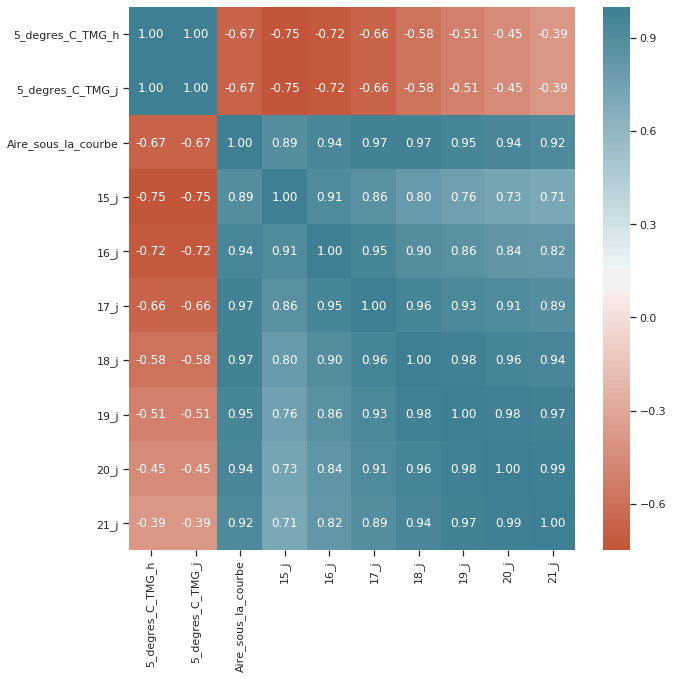

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(10, 10))

sns.heatmap(round(df[Col_pairplot].corr(),2), cmap=sns.diverging_palette(20, 220, n=200),annot=True, fmt=".2f")
plt.show()

In [10]:
df.drop(["5_degres_C_TMG_h"], axis = 1, inplace = True) 

In [11]:
df.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3.0,1.0,11.0,Témoin,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3.0,2.0,11.0,Témoin,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3.0,3.0,11.0,Témoin,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3.0,4.0,11.0,Témoin,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4.0,1.0,11.0,Témoin,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0


In [12]:
#classe pour l'ACP
from sklearn.decomposition import PCA

Col_ACP = ["15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

#instanciation
acp = PCA(n_components=2)

#calculs
acp.fit(df[Col_ACP])
ACP_parielle = acp.transform(df[Col_ACP])

In [13]:
#proportions de variance associées aux axes
acp.explained_variance_ratio_

array([0.92431978, 0.05146348])

In [14]:
#proportions de variance total associées aux axes
print("Proportion de variance associée aux deux axes:",round(sum(acp.explained_variance_ratio_),4))

Proportion de variance associée aux deux axes: 0.9758


In [15]:
df_partielle = pd.DataFrame(ACP_parielle, columns=['X1','X2']) 
Col = ["Bancs", "camera", "zone", "Pop", "5_degres_C_TMG_j", "Aire_sous_la_courbe"]
df_ACP_parielle = pd.concat([df[Col], df_partielle], axis=1)

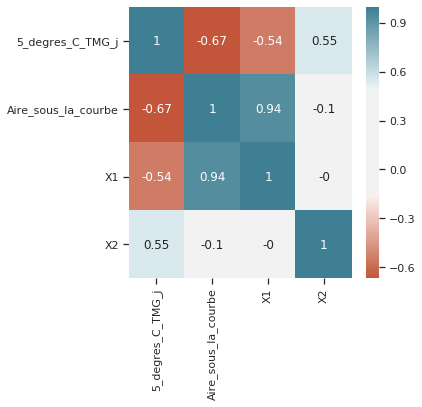

In [16]:
fig = plt.figure(1, figsize=(5, 5))

sns.heatmap(round(df_ACP_parielle[["5_degres_C_TMG_j", "Aire_sous_la_courbe", 'X1','X2']].corr(),2), cmap=sns.diverging_palette(20, 220, sep=100, n=200, as_cmap=True), annot=True)
plt.show()

In [17]:
df_ACP_parielle.drop(["Aire_sous_la_courbe"], axis = 1, inplace = True) 

In [18]:
print ("\nTotal des valeurs manquantes :  ",df_ACP_parielle.isnull().sum().values.sum())

print("\n")
print(df_ACP_parielle.isnull().sum())


Total des valeurs manquantes :   7


Bancs               1
camera              1
zone                1
Pop                 1
5_degres_C_TMG_j    1
X1                  1
X2                  1
dtype: int64


In [19]:
df_ACP_parielle = df_ACP_parielle.dropna()

In [20]:
df_ACP_parielle[["Bancs", "camera", "zone"]] = df_ACP_parielle[["Bancs", "camera", "zone"]].astype(int)
df_ACP_parielle.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,X1,X2
0,3,1,11,Témoin,17.25,-29.347070,4.334175
1,3,2,11,Témoin,17.95,-56.953843,7.857620
2,3,3,11,Témoin,15.95,-46.399069,-7.491244
3,3,4,11,Témoin,17.50,-74.363199,-6.115965
4,4,1,11,Témoin,18.04,-44.776618,6.841234


## 3. Graphes avec une ACP partielle

In [21]:
print ("\nValeurs uniques :")
print(df.nunique())
df_ACP_parielle.head()


Valeurs uniques :
Bancs                    2
camera                   4
zone                    24
Pop                      6
5_degres_C_TMG_j       365
Aire_sous_la_courbe    685
15_j                    17
16_j                    20
17_j                    22
18_j                    23
19_j                    23
20_j                    23
21_j                    24
dtype: int64


,Bancs,camera,zone,Pop,5_degres_C_TMG_j,X1,X2
0,3,1,11,Témoin,17.25,-29.347070,4.334175
1,3,2,11,Témoin,17.95,-56.953843,7.857620
2,3,3,11,Témoin,15.95,-46.399069,-7.491244
3,3,4,11,Témoin,17.50,-74.363199,-6.115965
4,4,1,11,Témoin,18.04,-44.776618,6.841234


In [22]:
print(df_ACP_parielle.Pop.unique())

['Témoin' '803' '830' '802' '815' '812']


Text(0.5, 0.9, 'Population: Témoin')

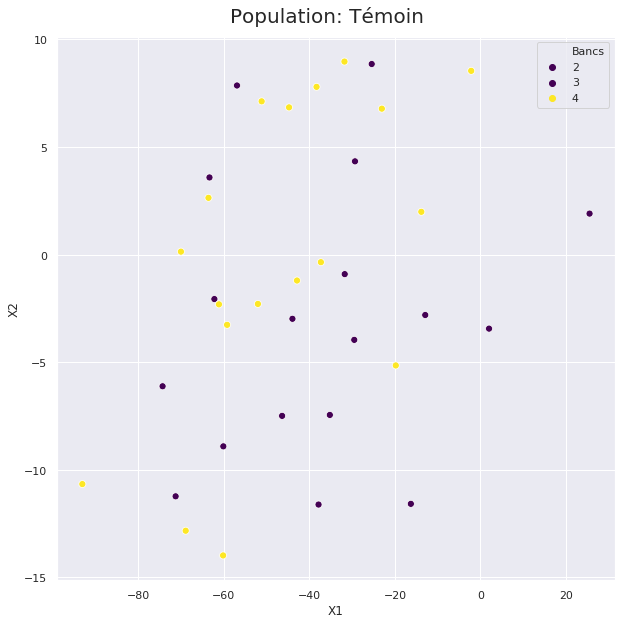

In [23]:
Y = ["Bancs", "camera", "zone"]
y = 0 # une catégorie dans Y

Pop = df_ACP_parielle.Pop.unique() # liste des différentes populations
p = 0 # une population dans Pop

df_Pop = df_ACP_parielle[df_ACP_parielle["Pop"] == Pop[p]]


sns.set(style="darkgrid")
filled_markers = ('o', 'X', '<',  'D','8', 's', 'p', '*', 'h', '>', 'H', 'd', 'P', '^')
plt.figure(figsize=(10,10))
sns.scatterplot(x="X1", y="X2" ,hue=Y[y], palette="viridis", markers=filled_markers, data=df_Pop, s =50)
plt.figtext(.5,.9,"Population: "+Pop[p], fontsize=20, ha='center')

#### Conclusions: 

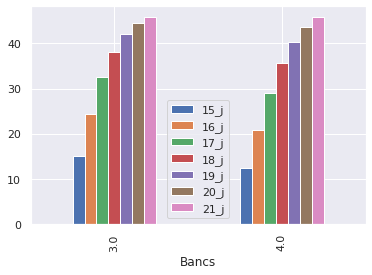

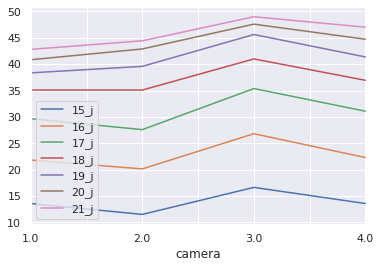

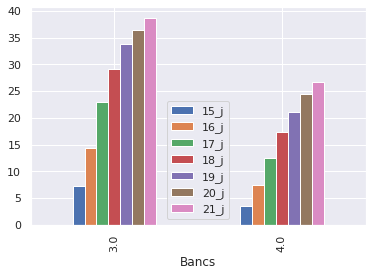

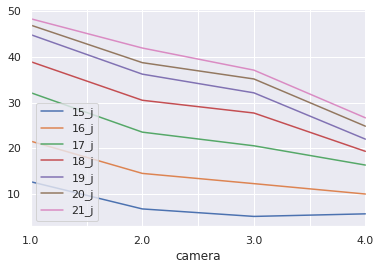

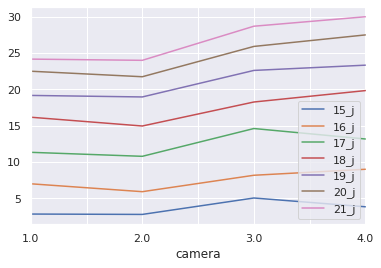

In [24]:
df['Bancs']=pd.Categorical(df['Bancs'])
df['camera']=pd.Categorical(df['camera'])
df['zone']=pd.Categorical(df['zone'])
df['Pop']=pd.Categorical(df['Pop'])
#df1 = df[df["Pop"] == '830']
df2 = df[df["Pop"] == "803"]
# df3 = df[df["Pop"] == '812']
# df4 = df[df["Pop"] == 'Témoin']
# df5 = df[df["Pop"] == '802']
df6 = df[df["Pop"] == "815"]
df6
df6s = df6[df6["Bancs"] == 3]
df6r= df6[df6["Bancs"] == 4]
#df.groupby('Bancs')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='bar')
#df1.groupby('Bancs')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
df2.groupby('Bancs')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='bar')
df2.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
#df3.groupby('Bancs')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
# df4.groupby('Bancs')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='bar')
# df5.groupby('Bancs')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='bar')
df6.groupby('Bancs')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='bar')
df6s.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
df6r.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
# df.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
#df1.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
# df3.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
# df4.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')
# df5.groupby('camera')['15_j','16_j','17_j','18_j','19_j','20_j','21_j'].mean().plot(kind='line')


## 4. ANOVA 

## 5. Prédictions

In [25]:
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.externals import joblib # save and load models

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

/app/anaconda/3-2019-07/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
# def object_to_int(dataframe_series):
#     """une simple fonction d'indexation"""
    
#     if dataframe_series.dtype=='object':
#         dataframe_series = LabelEncoder().fit_transform(dataframe_series)
#     return dataframe_series

In [27]:
Col_X = ["Bancs", "camera", "zone"]
Col_Y = ["15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

# df = df.apply(lambda x: object_to_int(x))
df[["Bancs", "camera", "zone"]] = df[["Bancs", "camera", "zone"]].astype(int)


df.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3,1,11,Témoin,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3,2,11,Témoin,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3,3,11,Témoin,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3,4,11,Témoin,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4,1,11,Témoin,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0


In [28]:
print ("Lignes: " ,df.shape[0])
print ("Colonnes: " ,df.shape[1])
print("---------------")
print ("\nVariables:")
print(df.dtypes)
print ("\nValeurs uniques :")
print(df.nunique())

Lignes:  959
Colonnes:  13
---------------

Variables:
Bancs                     int64
camera                    int64
zone                      int64
Pop                    category
5_degres_C_TMG_j        float64
Aire_sous_la_courbe     float64
15_j                    float64
16_j                    float64
17_j                    float64
18_j                    float64
19_j                    float64
20_j                    float64
21_j                    float64
dtype: object

Valeurs uniques :
Bancs                    2
camera                   4
zone                    24
Pop                      6
5_degres_C_TMG_j       365
Aire_sous_la_courbe    685
15_j                    17
16_j                    20
17_j                    22
18_j                    23
19_j                    23
20_j                    23
21_j                    24
dtype: int64


In [29]:
df_save = df.copy()
df_save.head()

,Bancs,camera,zone,Pop,5_degres_C_TMG_j,Aire_sous_la_courbe,15_j,16_j,17_j,18_j,19_j,20_j,21_j
0,3,1,11,Témoin,17.25,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3,2,11,Témoin,17.95,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3,3,11,Témoin,15.95,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3,4,11,Témoin,17.50,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4,1,11,Témoin,18.04,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0


### a. Prédiction de la Germination sur l'ensemble de la Population

In [30]:
jour = "18_j"

df = df_save

X = df[Col_X]
y = df[jour]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)

#### GradientBoosting

In [31]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#on crée un nouveau modèle gradient Boosting
GB = GradientBoostingRegressor()

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_GB = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.5],
    "min_samples_leaf": [0.001, 0.005, 0.01],
    "max_depth":[3, 5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[10, 20,50],
    }

#on utilise gridsearch pour tester toutes les valeurs de param_grid
GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
t_debut = time.time()
GB_gscv.fit(X_train,y_train)
t_fin = time.time()

temps_GB = (t_fin - t_debut)/60

print(GB_gscv.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  

{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 0.005, 'n_estimators': 10, 'subsample': 0.5}


[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   17.9s finished


In [32]:
from sklearn.metrics import mean_squared_error,max_error, explained_variance_score
from math import sqrt

rmse_test = sqrt(mean_squared_error(y_test, GB_gscv.best_estimator_.predict(X_test)))
max_error = max_error(y_test, GB_gscv.best_estimator_.predict(X_test))
mape = round(mean_absolute_percentage_error(y_test, GB_gscv.best_estimator_.predict(X_test)),2)

print("L’erreur quadratique moyenne: %.4f" % rmse_test)
print("L’erreur absolue moyenne en pourcentage: ",mape,"%")
print("L’erreur maximun: %.4f" % max_error)
print("Moyenne: %.4f" %  y_test.mean())
print("Mediane: %.4f" %  y_test.median())

L’erreur quadratique moyenne: 20.3377
L’erreur absolue moyenne en pourcentage:  inf %
L’erreur maximun: 49.2461
Moyenne: 40.2667
Mediane: 40.0000


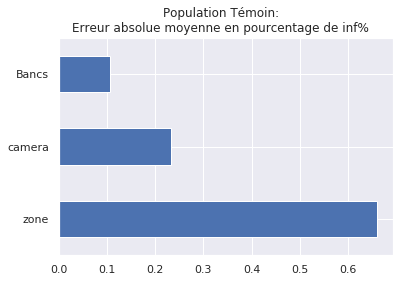

In [33]:
model = GB_gscv.best_estimator_
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.figtext(.5,.9,"Population " +Pop[p]+":" +"\nErreur absolue moyenne en pourcentage de " + str(mape)+"%", fontsize=12, ha='center')
plt.show()

### b. Prédiction de la Germination pour chaque type de Population à 18_j

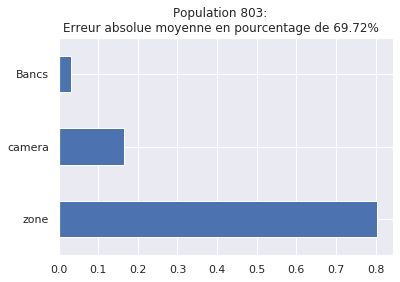

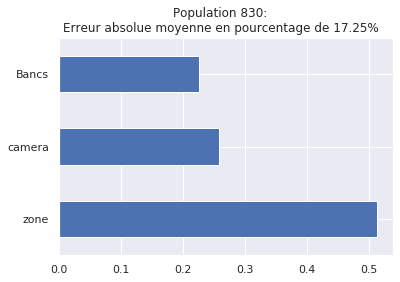

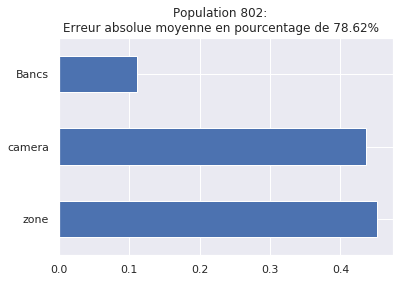

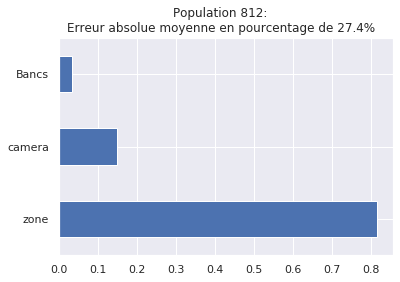

In [34]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Pop = df_ACP_parielle.Pop.unique() # liste des différentes populations

jour = "18_j"

#on crée un nouveau modèle gradient Boosting
GB = GradientBoostingRegressor()

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_GB = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.5],
    "min_samples_leaf": [0.001, 0.005, 0.01],
    "max_depth":[3, 5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[10, 20,50],
    }

#on utilise gridsearch pour tester toutes les valeurs de param_grid
GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=0)


for p in Pop:
    df = df_save[df_save["Pop"] == p]
    
    X = df[Col_X]
    y = df[jour]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)
    GB_gscv.fit(X_train,y_train)
    
    MAPE = round(mean_absolute_percentage_error(y_test, GB_gscv.best_estimator_.predict(X_test)),2)
    
    if MAPE < 1000: # On ne répresente que les Gérmination avec des valeurs non nulles
        model = GB_gscv.best_estimator_
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(20).plot(kind='barh')
        plt.figtext(.5,.9,"Population " +p+":" +"\nErreur absolue moyenne en pourcentage de " + str(MAPE)+"%", fontsize=12, ha='center')
        plt.show()


### b. Prédiction de la Germination de chaque Jour pour la Population 830

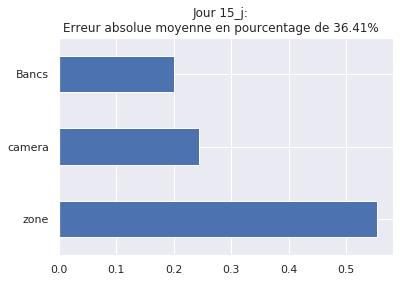

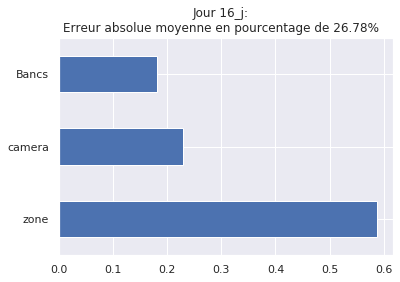

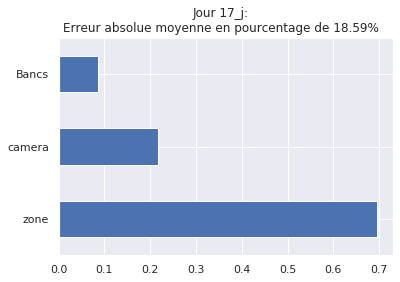

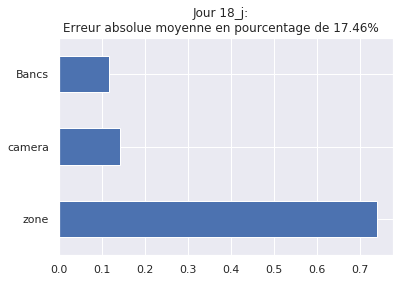

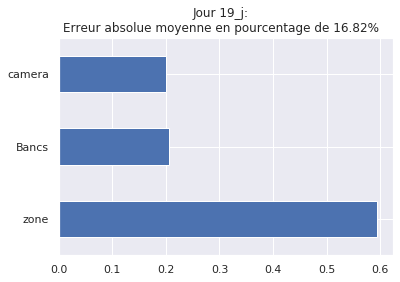

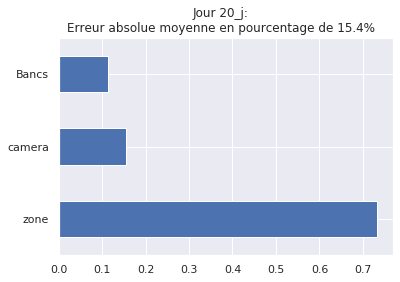

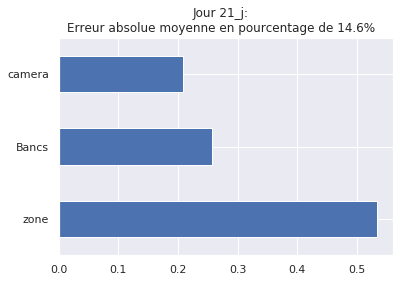

In [35]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Col_Y = ["15_j", "16_j", "17_j", "18_j", "19_j", "20_j", "21_j"]

#on crée un nouveau modèle gradient Boosting
GB = GradientBoostingRegressor()

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_GB = {
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.5],
    "min_samples_leaf": [0.001, 0.005, 0.01],
    "max_depth":[3, 5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[10, 20,50],
    }

#on utilise gridsearch pour tester toutes les valeurs de param_grid
GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=0)

df = df_save[df_save["Pop"] == '830']

for jour in Col_Y:
    
    X = df[Col_X]
    y = df[jour]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 40)
    GB_gscv.fit(X_train,y_train)
    
    MAPE = round(mean_absolute_percentage_error(y_test, GB_gscv.best_estimator_.predict(X_test)),2)
    
    if MAPE < 1000: # On ne répresente que les Gérmination avec des valeurs non nulles
        model = GB_gscv.best_estimator_
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(20).plot(kind='barh')
        plt.figtext(.5,.9,"Jour " +jour+":" +"\nErreur absolue moyenne en pourcentage de " + str(MAPE)+"%", fontsize=12, ha='center')
        plt.show()
